In [29]:
# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
import seaborn as sns
from sklearn.metrics import accuracy_score,f1_score,confusion_matrix,classification_report
from sklearn.model_selection import train_test_split,cross_val_score,KFold,StratifiedKFold
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.linear_model import LogisticRegression, LinearRegression,Ridge,Lasso,ElasticNet
import lightgbm as lg
import optuna
from category_encoders import *
from sklearn.pipeline import Pipeline


import warnings
warnings.filterwarnings('ignore')
import pickle
#Get your class weights

from sklearn.utils.class_weight import compute_class_weight
from sklearn.ensemble import RandomForestClassifier

SEED = 123



%matplotlib inline
sns.set_style('darkgrid')
matplotlib.rcParams["font.size"] = 14
matplotlib.rcParams["figure.figsize"] = (9, 5)
matplotlib.rcParams["figure.facecolor"] = "#00000000"

In [30]:


train1 = pd.read_csv('Train.csv')

test1 = pd.read_csv('Test.csv')


samplesubmission = pd.read_csv('SampleSubmission.csv')


# Preview train dataset
test1.iloc[0].to_dict()

{'ID': 'ID_ZPMABNVX',
 'Year_of_Birth': 1954,
 'Education_Level': 'Graduation',
 'Marital_Status': 'Single',
 'Disposable_Income': 48556.8,
 'No_of_Kids_in_home': 0,
 'No_of_Teen_in_home': 1,
 'Date_Customer': '11-01-2013',
 'Recency': 85,
 'Discounted_Purchases': 6,
 'WebPurchases': 8,
 'CatalogPurchases': 2,
 'StorePurchases': 8,
 'Amount_on_Wines': 429,
 'Amount_on_Fruits': 20,
 'Amount_on_MeatProducts': 118,
 'Amount_on_FishProducts': 7,
 'Amount_on_SweetProducts': 23,
 'Amount_on_GoldProds': 41,
 'WebVisitsMonth': 8,
 'Cmp3Accepted': 0,
 'Cmp4Accepted': 0,
 'Cmp5Accepted': 0,
 'Cmp1Accepted': 0,
 'Cmp2Accepted': 0,
 'Any_Complain': 0}

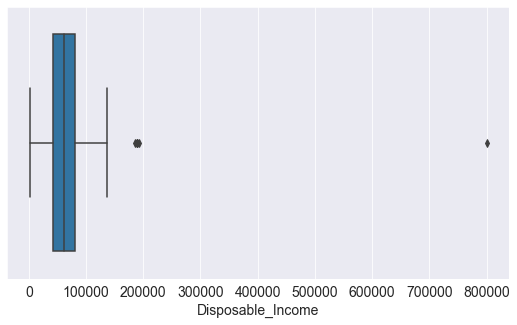

In [31]:
sns.boxplot(train1['Disposable_Income'])


train1.loc[train1['Disposable_Income'] > 200000]

train1 = train1.drop(190)

In [32]:
train1.drop('ID',1,inplace = True)

test1.drop('ID',1,inplace = True)

test1['Response'] = 2

data = pd.concat([train1,test1]).reset_index(drop=True)

In [33]:
data.describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
Year_of_Birth,2239.0,NaN,NaN,NaN,1969.802144,11.985494,1894.0,1960.0,1971.0,1978.0,1997.0
Education_Level,2239,5,Graduation,1126,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Marital_Status,2239,8,Married,864,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Disposable_Income,2215.0,NaN,NaN,NaN,62363.833679,25831.584114,2076.0,42340.8,61647.6,82184.4,194876.4
No_of_Kids_in_home,2239.0,NaN,NaN,NaN,0.443948,0.53839,0.0,0.0,0.0,1.0,2.0
No_of_Teen_in_home,2239.0,NaN,NaN,NaN,0.506476,0.544555,0.0,0.0,0.0,1.0,2.0
Date_Customer,2239,663,31-08-2012,12,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Recency,2239.0,NaN,NaN,NaN,56.121036,28.963662,7.0,31.0,56.0,81.0,106.0
Discounted_Purchases,2239.0,NaN,NaN,NaN,2.324252,1.932345,0.0,1.0,2.0,3.0,15.0
WebPurchases,2239.0,NaN,NaN,NaN,4.085306,2.77924,0.0,2.0,4.0,6.0,27.0


#  Feature engineering

In [34]:



data['Disposable_Income'].fillna(-9999, inplace=True)


min(data['Date_Customer'])

'01-01-2013'

In [35]:
data['Date_Customer'] = pd.to_datetime(data['Date_Customer'])
# test['Date_Customer'] = pd.to_datetime(test['Date_Customer'])


Today =  pd.to_datetime('2015-1-1')



# Extract date features
def extract_date_info(df,cols):
    for feat in cols:
        df[feat +'_year'] = df[feat].dt.year        
        df[feat +'_day'] = df[feat].dt.day
        df[feat +'_month'] = df[feat].dt.month
        df[feat +'_quarter'] = df[feat].dt.quarter  
        df[feat +'_weekday'] = df[feat].dt.weekday
        
        
        
        
    # df.drop(columns=['Date_Customer'],axis=1,inplace=True)


extract_date_info(data,['Date_Customer'])

data['Duration_Customer']  = (Today - data['Date_Customer']).dt.days

data['months_Dur_Customer'] = (Today- data['Date_Customer']) / pd.Timedelta(days=31)
data['months_Dur_Customer'] = data['months_Dur_Customer'].astype(int)

dw_mapping={
    0: 'Monday', 
    1: 'Tuesday', 
    2: 'Wednesday', 
    3: 'Thursday', 
    4: 'Friday',
    5: 'Saturday', 
    6: 'Sunday'
} 
data['day_of_week_name']=data['Date_Customer'].dt.weekday.map(dw_mapping)


data['is_month_end'] = data.Date_Customer.dt.is_month_end.astype(int)
data['is_month_start'] = data.Date_Customer.dt.is_month_start.astype(int)

data.head()

data.drop(columns=['Date_Customer'],axis=1,inplace=True)

In [36]:
#combine the year month feature  

data['year_month'] = data['Date_Customer_year'].apply(str) + '_' + data['Date_Customer_month'].apply(str)

# data['year_month_mean'] = data

data['Recency' + 'year_month_mean'] =data.groupby('year_month')['Recency'].transform('mean')
data['Recency' + 'year_month_std'] =data.groupby('year_month')['Recency'].transform('std')
data['Recency' + 'year_month_min'] =data.groupby('year_month')['Recency'].transform('min')
data['Recency' + 'year_month_max'] =data.groupby('year_month')['Recency'].transform('max')

data

,Year_of_Birth,Education_Level,Marital_Status,Disposable_Income,No_of_Kids_in_home,No_of_Teen_in_home,Recency,Discounted_Purchases,WebPurchases,CatalogPurchases,...,Duration_Customer,months_Dur_Customer,day_of_week_name,is_month_end,is_month_start,year_month,Recencyyear_month_mean,Recencyyear_month_std,Recencyyear_month_min,Recencyyear_month_max
0,1955,Graduation,Divorced,77504.4,1,1,56,2,1,1,...,193,6,Sunday,0,0,2014_6,53.590164,30.163652,7,106
1,1958,Graduation,Together,56784.0,0,1,17,6,5,1,...,723,23,Tuesday,0,0,2013_1,56.645833,27.109128,7,106
2,1962,Graduation,Single,103714.8,0,0,17,0,7,4,...,406,13,Thursday,0,0,2013_11,55.160000,28.999728,7,104
3,1979,2n Cycle,Single,46311.6,1,0,49,3,4,1,...,475,15,Friday,0,0,2013_9,52.218391,31.242646,7,106
4,1959,Graduation,Married,87486.0,0,0,59,1,3,7,...,345,11,Tuesday,0,0,2014_1,53.822785,30.751177,7,105
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2234,1975,Graduation,Married,80934.0,0,1,70,5,9,6,...,754,24,Saturday,0,0,2012_12,52.000000,27.772888,8,104
2235,1955,Graduation,Divorced,84052.8,0,1,53,4,7,10,...,682,22,Monday,0,0,2013_2,53.035714,28.370753,8,104
2236,1952,PhD,Married,63974.4,0,0,39,1,5,1,...,480,15,Sunday,0,0,2013_9,52.218391,31.242646,7,106
2237,1960,Graduation,Together,69548.4,0,1,31,7,4,6,...,500,16,Monday,0,0,2013_8,57.153846,26.609645,9,104


In [37]:
poly_feature_1 = ['Discounted_Purchases', 'WebPurchases', 'CatalogPurchases',
       'StorePurchases']
poly_feature_2 = ['Amount_on_Wines', 'Amount_on_Fruits',
       'Amount_on_MeatProducts', 'Amount_on_FishProducts',
       'Amount_on_SweetProducts', 'Amount_on_GoldProds']

In [38]:
from sklearn.preprocessing import PolynomialFeatures

poly = PolynomialFeatures(degree=2, interaction_only=True, include_bias=False)

poly1 = poly.fit_transform(data[poly_feature_1])
poly2 = poly.fit_transform(data[poly_feature_2])


df_poly1 = pd.DataFrame(poly1, columns=[f"poly1_{i}" for i in range(poly1.shape[1])])
df_poly2 = pd.DataFrame(poly2, columns=[f"poly2_{i}" for i in range(poly2.shape[1])])

new_data = pd.concat([data, df_poly1], axis = 1)
new_data = pd.concat([new_data, df_poly2], axis = 1)

data = new_data

In [39]:

data['Rec_count'] = pd.qcut(data.Recency, q = [0, .2, .4, .6, .8, 1], labels=False)
data['Web_count'] = pd.qcut(data.WebVisitsMonth, q = [0, .2, .4, .6, .8, 1], labels=False)

# data['Age'] = Today.year - data['Year_of_Birth'] 

data['WebVisitsMonth'].max()

20

In [40]:
data['total_kids'] = data['No_of_Kids_in_home'] + data['No_of_Teen_in_home']


data['total_purchase'] = data['WebPurchases'] + data['CatalogPurchases'] + data['StorePurchases']

data['tot_food_price'] = data['Amount_on_Fruits'] + data['Amount_on_MeatProducts']+ data['Amount_on_Wines'] + data['Amount_on_FishProducts'] + data['Amount_on_SweetProducts'] + data['Amount_on_GoldProds']

#data['Amount_on_Wines']+ 

data['wine_frac'] = data['Amount_on_Wines'] / data['tot_food_price']

data['fish_net'] = data['tot_food_price']  - data['Amount_on_FishProducts'] 


data['gold_dis'] = data['Amount_on_GoldProds'] / data['Disposable_Income']  


data['meat_dis'] = data['Amount_on_MeatProducts'] / data['Disposable_Income']  

data['wine_dis'] = data['Amount_on_Wines'] / data['Disposable_Income']  


data['food_dis'] = data['Disposable_Income']  - data['tot_food_price'] 


# Model building

In [41]:
#list of selected features

feat= ['Recency', 'year_month', 'Rec_count', 'Cmp3Accepted', 'Cmp5Accepted',
       'Cmp1Accepted', 'WebVisitsMonth', 'Marital_Status', 'wine_frac',
       'Duration_Customer', 'gold_dis', 'No_of_Teen_in_home', 'Web_count',
       'poly2_7', 'poly2_2', 'StorePurchases', 'Disposable_Income', 'poly1_3',
       'months_Dur_Customer', 'poly2_5', 'poly1_7', 'Education_Level',
       'poly2_11', 'total_kids', 'food_dis', 'poly1_9',
       'Amount_on_MeatProducts', 'Cmp4Accepted', 'poly2_17', 'fish_net',
       'poly2_3', 'meat_dis', 'poly1_2', 'poly2_10', 'CatalogPurchases',
       'Amount_on_FishProducts', 'WebPurchases', 'day_of_week_name', 'poly1_8',
       'Amount_on_GoldProds','Response']




data = data[feat]



In [42]:

#split the data into features and target
test =data[data['Response'] == 2]
test.drop(['Response'],1,inplace =True)



print(test.shape)

train =data[data['Response'] != 2]
#train_b= train_b.astype('float64')

# train_b = drop_outliers(train_b,3)


test.isnull().sum()

print(train.shape)

(672, 40)
(1567, 41)


In [43]:

t_target = train['Response']

t_data = train.drop(['Response'],1).reset_index(drop=True)

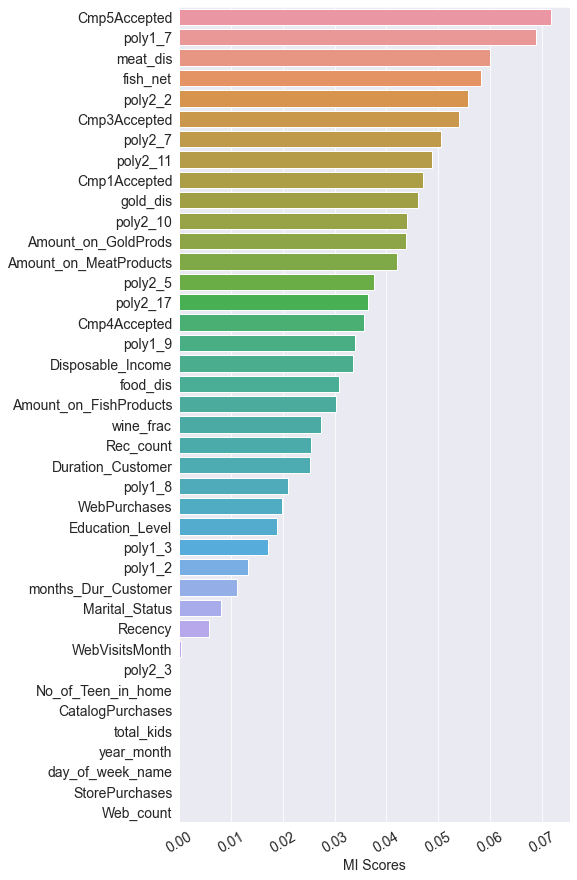

In [44]:
#Mutual information for feature selection

rf = t_data.copy()


# Label encoding for categoricals
for colname in rf.select_dtypes(["object","category"]):
    rf[colname], _ = rf[colname].factorize()

# All discrete features should now have integer dtypes (double-check this before using MI!)
discrete_features = rf.dtypes == int



from sklearn.feature_selection import mutual_info_regression

def make_mi_scores(X, y, discrete_features):
    mi_scores = mutual_info_regression(X, y, discrete_features=discrete_features)
    mi_scores = pd.Series(mi_scores, name="MI Scores", index=X.columns)
    mi_scores = mi_scores.sort_values(ascending=False)
    return mi_scores

# fr = rf.drop('location',1)

mi_scores = make_mi_scores(rf, t_target, discrete_features)
# mi_scores[::3]
# mi_scores[::3][mi_scores[::3] > 0.001]


#Plot mutual information
def plot_mi_scores(scores):
    scores = scores.sort_values(ascending=False)
    
    
    plt.figure(figsize=(7,15))
    plt.xticks(rotation= 30)
    

    sns.barplot(x=scores , y= scores.index) 
    plt.show()
    
   

    #pram ={'criterion': 'entropy', 'max_depth': 2, 'max_features': 22, 'max_leaf_nodes': 123, 'min_samples_leaf': 14,
       #'min_samples_split': 42, 'min_weight_fraction_leaf': 0.010574958266160707,'random_state':SEED}

# plt.figure(dpi=100, figsize=(8, 5))

plot_mi_scores(mi_scores)




In [45]:
train_x, test_x, train_y, test_y = train_test_split(t_data, t_target, stratify= t_target,test_size=0.2,
                                                    random_state=SEED)


param = {'learning_rate': 0.143373511155058,
 'reg_lambda': 3.579661579314026,
 'reg_alpha': 4.805773216010388e-08,
 'subsample': 0.48731004944996775,
 'colsample_bytree': 0.7142487807145416,
 'max_depth': 5,
 'scale_pos_weight': 5}

In [46]:
ordi = OrdinalEncoder(cols=train_x[['Education_Level','Marital_Status']]) 
trg = TargetEncoder(cols=train_x[['year_month','day_of_week_name']])


Light = lg.LGBMClassifier(**param ,n_estimators=100,random_state=SEED)


step = [ ('encoder', ordi),('enc', trg),('lgbm',Light)] 

pipeline = Pipeline(step)

        
pipeline = pipeline.fit(train_x,train_y)



preds = pipeline.predict_proba(test_x)[:,1]

# preds = pipeline.predict(test_x)

pred = np.where(preds > 0.5, 1 , 0)



rmse =f1_score(test_y,pred)




print('Accuracy score : ',accuracy_score(test_y,pred))
print('F1 score : ',rmse, '\t')
print('Confusion matrix :') 
print(confusion_matrix(test_y,pred))
print(classification_report(test_y,pred))

# print(pipeline.get_params())

print(pred)

Accuracy score :  0.8694267515923567
F1 score :  0.6019417475728155 	
Confusion matrix :
[[242  24]
 [ 17  31]]
              precision    recall  f1-score   support

           0       0.93      0.91      0.92       266
           1       0.56      0.65      0.60        48

    accuracy                           0.87       314
   macro avg       0.75      0.78      0.76       314
weighted avg       0.88      0.87      0.87       314

[0 0 0 0 1 1 0 0 0 0 0 0 0 0 0 0 0 1 0 0 1 0 1 0 0 0 1 0 1 0 0 0 0 0 0 0 0
 1 0 0 0 0 0 0 0 0 1 1 0 1 0 0 0 1 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 1 0 1 0 0 0 0 0 0 0 0 0 1 0 0 0 1 0 0 0 0 0 1 0 0 0 0 1 0 0 0 0 0 1 0
 0 0 0 0 0 0 0 0 0 0 0 1 1 1 0 0 1 0 1 0 0 1 1 0 0 0 0 0 0 1 0 0 0 0 0 0 0
 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 1 0 0
 0 0 0 0 0 0 1 0 0 0 1 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 1 1 0 0 0 0 0 1 0 0 1 1 1 1 0 0 0 0 0 0 0 1 1 0 0 0 0 0 1 0 0
 0 0 0 1 0 0 0 1 1 0 0 0 0 0 0 0 0 0

Text(0.5, 1.0, 'Model features importance:')

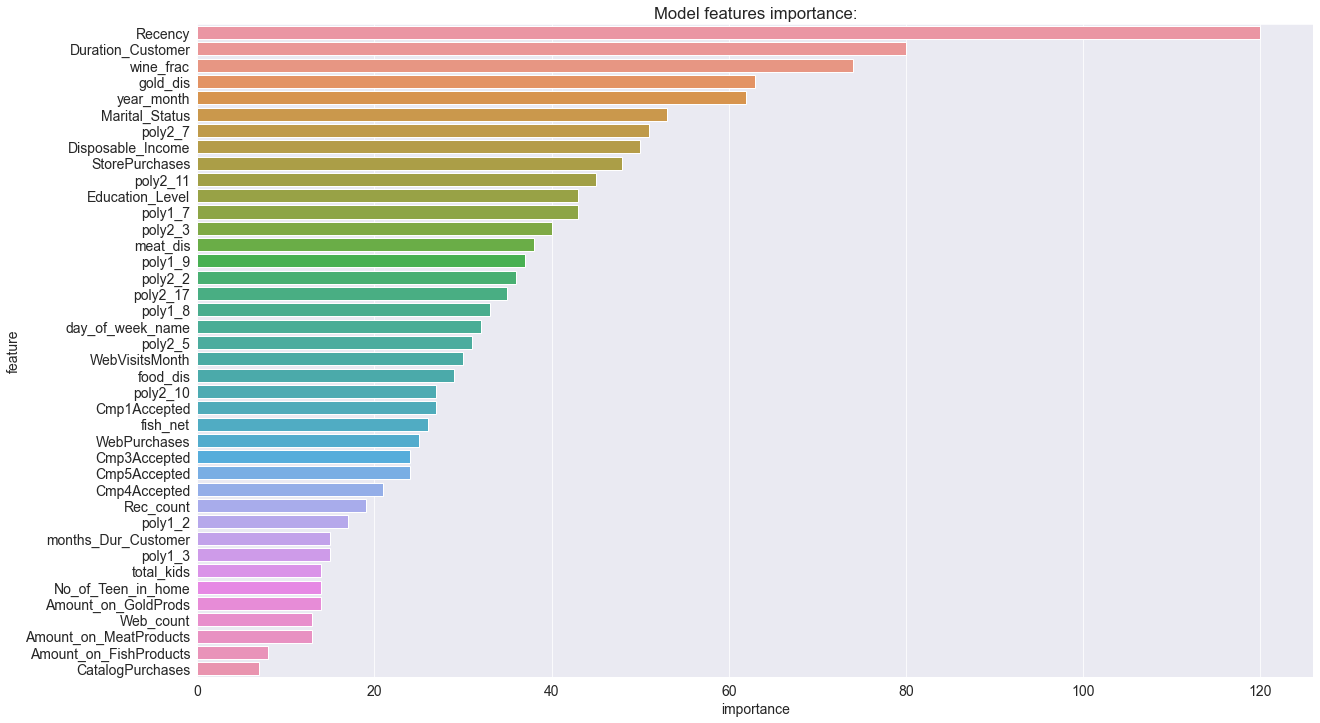

In [48]:


feature_importance_df = pd.DataFrame(Light.feature_importances_, columns=['importance'])
feature_importance_df['feature'] = train_x.columns

plt.figure(figsize=(20, 12));
sns.barplot(x="importance", y="feature", data=feature_importance_df.sort_values(by = ['importance'], ascending = False).head(60))
plt.title('Model features importance:')

In [ ]:
filename = 'campaign_model.sav'
with open(filename,'wb') as ft:
    pickle.dump(pipeline, ft)